In [2]:
# Import necessary libraries for data manipulation, visualization and clustering.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset 
customer_data=pd.read_csv('Mall_Customers.csv')

In [4]:
# Display first five rows of the dataset
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Get the shape of the dataset
customer_data.shape

(200, 5)

In [6]:
# Getting detailed information of the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Checks null values in the dataset
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Data cleaning step:
# In this case, there are no null values, so no imputation or removal is needed.
# If there were null values, you should fill them in or drop the rows/columns.

In [9]:
# Select the features Annual Income and Spending Score
X = customer_data.iloc[:,[2,4]].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [10]:
# Initialize empty list
wcss = []
# Use elbow method to find optimal number of clusters
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)# Initialize kmeans algorithm
  kmeans.fit(X) # Fit the algorithm to select the features
  wcss.append(kmeans.inertia_)

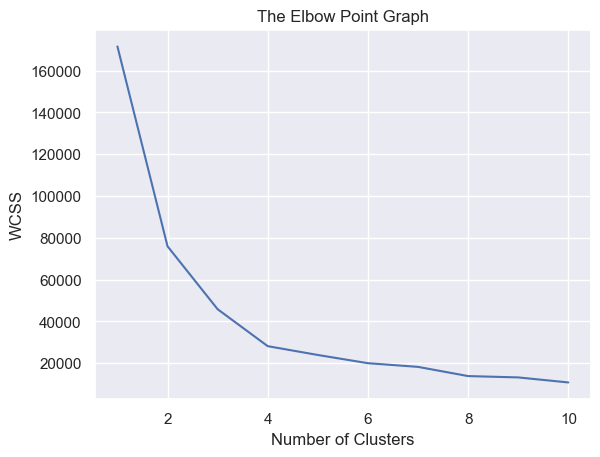

In [11]:
# Set style for the plot
sns.set()
# plot the WCSS values to visualize the eblow point
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Apply kMeans with optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
# print the predicted clusters for each data point
print(Y)

[4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 3 4 3 1 3 1 2 1 2 1 3 4 3 1 2 1 2 1 2 1 2
 1 2 1 0 1 3 4 2 4 3 4 4 4 3 4 4 0 3 3 3 0 4 3 0 4 0 0 0 4 3 0 4 4 0 3 0 0
 0 4 3 3 4 3 0 3 0 3 4 3 0 4 4 3 0 4 3 3 4 4 3 4 3 4 4 3 0 4 3 4 0 3 0 0 0
 4 3 4 4 4 0 3 3 3 4 3 3 1 4 1 3 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 1 3 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


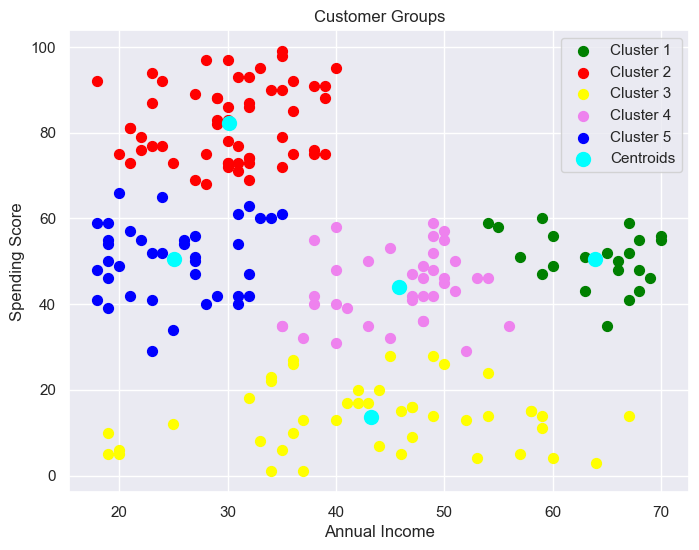

In [15]:
# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=50, c='green', label='Customer 1 ')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=50, c='red', label='Customer 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=50, c='yellow', label='Customer 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s=50, c='violet', label='Customer 4 ')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s=50, c='blue', label='Customer 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')
# Add title and labels to the plot
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
# Show the plot
plt.show()